In [282]:
from Final_code import*

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import cv2
import matplotlib.pyplot as plt

#Training Model with MNIST data set

In [167]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train/255
X_test = X_test/255
X_train_flatten = X_train.reshape(len(X_train), 28*28)
X_test_flatten = X_test.reshape(len(X_test), 28*28)
model = keras.Sequential([keras.layers.Dense(100, input_shape =(784,),activation = 'relu'),
                         keras.layers.Dense(10, activation = 'sigmoid')])
#opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model.fit(X_train_flatten, y_train, epochs = 10,batch_size=32)
model.evaluate(X_test_flatten, y_test)
y_predicted = model.predict(X_test_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2963 - accuracy: 0.9168
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1367 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0964 - accuracy: 0.9709
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9773
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0599 - accuracy: 0.9818
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0493 - accuracy: 0.9848
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0414 - accuracy: 0.9876
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0353 - accuracy: 0.9895
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0302 - accuracy: 0.9912
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.0751 

In [168]:
model.evaluate(X_test_flatten, y_test)

313/313 [==============================] - 0s 940us/step - loss: 0.0751 - accuracy: 0.9763


[0.07506304979324341, 0.9763000011444092]

#Getting Images of 0 to 1

In [169]:
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 973,    0,    0,    2,    0,    0,    3,    1,    1,    0],
       [   0, 1128,    2,    0,    0,    0,    1,    1,    3,    0],
       [   5,    5, 1001,    4,    4,    0,    3,    7,    2,    1],
       [   1,    0,    5,  988,    0,    3,    1,    6,    4,    2],
       [   0,    0,    3,    1,  963,    2,    3,    3,    0,    7],
       [   1,    1,    0,   11,    1,  860,    8,    3,    5,    2],
       [   2,    3,    3,    1,    3,    7,  939,    0,    0,    0],
       [   1,    7,    5,    1,    2,    0,    0, 1005,    4,    3],
       [   4,    1,    3,   12,    2,    7,    3,    2,  937,    3],
       [   1,    4,    0,   10,   13,    3,    0,    7,    2,  969]])>

Text(69.0, 0.5, 'truth')

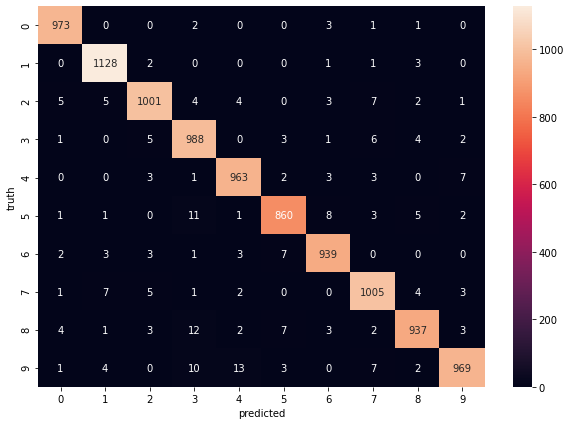

In [170]:
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('truth')

In [211]:
image_list=[]
for i in range(0,10):
    image='image'+str(i)+'.png'
    image_list.append(image)
print('image_list: ',image_list)


image_list:  ['image0.png', 'image1.png', 'image2.png', 'image3.png', 'image4.png', 'image5.png', 'image6.png', 'image7.png', 'image8.png', 'image9.png']


#Predicting images from 0 to 9

In [210]:
#images 0 to 9 prediction
import time
predict_list=[]
for image in image_list:
    #print(image)
    file= image
    #print(file)
    test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)
    img2_resized= img_resized/255
    #print(img_resized)
    img_resized_flatten = img2_resized.reshape(1, 28*28)
    y_predicted = model.predict(img_resized_flatten)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    #print(y_predicted_labels)
    predict_list.append(y_predicted_labels)
    #time.sleep(3)
print(predict_list)
    

[[0], [1], [2], [3], [4], [5], [6], [7], [8], [9]]


#Test prediction for any single image

In [212]:
file= 'image3.png' #test image
#print(file)
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
img_resized = cv2.bitwise_not(img_resized)
img2_resized= img_resized/255
#print(img_resized)
img_resized_flatten = img2_resized.reshape(1, 28*28)
y_predicted = model.predict(img_resized_flatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels)

[3]


#Reading the images of Sudoku grid(81 cell images) in to list

#Reading images of SUDOKU GRID

In [224]:
image_list=[]
for i in range(0,9):
    for j in range(0,9):
        image='cell'+str(i)+str(j)+'.png'
        image_list.append(image)
#print('image_list: ',image_list)


#predicting given set of images and appending it to a list using our trained model

In [225]:
import time
predict_list=[]
for image in image_list:
    #print(image)
    file= image
    #print(file)
    test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
    img_resized = cv2.bitwise_not(img_resized)
    img2_resized= img_resized/255
    #print(img_resized)
    img_resized_flatten = img2_resized.reshape(1, 28*28)
    y_predicted = model.predict(img_resized_flatten)
    y_predicted_labels = [np.argmax(i) for i in y_predicted]
    #print(y_predicted_labels)
    predict_list.append(y_predicted_labels)
    #time.sleep(3)
    
#print(predict_list)


In [284]:
my_array = np.array(predict_list)
puzzle = np.reshape(my_array, (9,9))
print('sudoku input matrix\n puzzle=\n',puzzle)


sudoku input matrix
 puzzle=
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 9 0 5]]


#Original input
[[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 9 0 5]]

sudoku input matrix
 [[5 0 8 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 9 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [5 0 7 0 6 9 0 9 0]
 [0 0 0 0 0 4 0 0 5]
 [0 0 0 0 0 0 3 0 5]]
#with learning_rate

sudoku input matrix
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 9 0 5]]
for picture 50

sudoku input matrix
 [[5 0 3 0 0 0 0 0 0]
 [2 0 0 3 0 0 0 0 0]
 [0 4 0 7 1 0 2 0 3]
 [0 0 5 4 0 0 0 7 1]
 [0 0 4 2 0 1 8 0 0]
 [6 8 0 0 0 7 5 0 0]
 [1 0 7 0 6 9 0 3 0]
 [0 0 0 0 0 4 0 0 6]
 [0 0 0 0 0 0 3 0 5]
 
for picture22

#Plotting original image

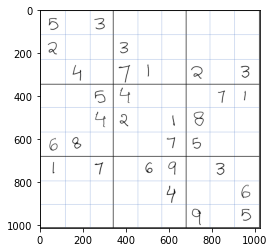

In [264]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
from matplotlib import pyplot
img = mpimg.imread('pic13.png')
imgplot = plt.imshow(img)
plt.show()

In [285]:
puzzle

array([[5, 0, 3, 0, 0, 0, 0, 0, 0],
       [2, 0, 0, 3, 0, 0, 0, 0, 0],
       [0, 4, 0, 7, 1, 0, 2, 0, 3],
       [0, 0, 5, 4, 0, 0, 0, 7, 1],
       [0, 0, 4, 2, 0, 1, 8, 0, 0],
       [6, 8, 0, 0, 0, 7, 5, 0, 0],
       [1, 0, 7, 0, 6, 9, 0, 3, 0],
       [0, 0, 0, 0, 0, 4, 0, 0, 6],
       [0, 0, 0, 0, 0, 0, 9, 0, 5]], dtype=int64)

#Sudoku Solving with Generated matrix

In [287]:
def showTable(puzzle):
    fig, ax =plt.subplots(1,1)

    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=puzzle,loc="center")

    plt.show()

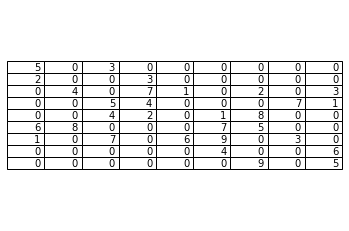

In [288]:
showTable(puzzle)

In [289]:
def index_to_position(index):
    strides = (9,1)
    pos = 0
    for i in range(len(strides)):
        pos = pos + strides[i]*index[i]
    return pos

In [290]:
def index_in_table(position):
    shape=(9,9)
    l1 = list(shape)
    pos = position
    out_index=[0,0]
    strides = (9,1)

    def mul(a):
        mul = 1
        for each in a:
            mul = mul * each
        return mul

    for i in range(0, len(strides)):

        if i == len(l1) - 1:
            val = pos % l1[i]
            out_index[i] = int(val)

        else:
            sublist = l1[i + 1:]
            val = pos / mul(sublist)
            out_index[i] = int(val)
            pos = pos - int(val) * mul(sublist)
    return out_index[0], out_index[1]

In [291]:
class Node:
    def __init__(self,x,y,c):
        self.x_pos = x #x_pos
        self.y_pos = y #y_pos
        self.color = c
        self.available_colors = None
        self.neighbors_restricted = None
    def update_colors(self):
        self.available_colors = {1,2,3,4,5,6,7,8,9}.difference(set([x.color for x in self.neighbor_list]))
        
    '''
    def restricted_for_neighbors(self):
        restricted_list = []
        for each in self.neighbor_list:
            if (each.color == 0):
                for i in each.neighbor_list:
                    if i.color != 0:
                        restricted_list.append(i.color)
        self.neighbors_restricted = set(restricted_list)
      '''              
    def update_node(self):
        self.update_colors()
        # self.restricted_for_neighbors()
        
    

#puzzle=[[0]*9]*9
storage =[]
for i in range (0,9):
    for j in range(0,9):
        c = puzzle[i][j]
        newNode= Node(i,j,c)
        storage.append(newNode)
    

In [292]:
def update_puzzle():
    for i in range(0,9):
        for j in range(0,9):
            puzzle[i][j]=storage[index_to_position([i,j])].color
            

In [293]:
update_puzzle()

In [294]:
def row_col_adj(x_pos,y_pos):
    neighbor_list=[]
    for i in range(9):
        neighbor_list.append(storage[index_to_position([x_pos,i])])
        neighbor_list.append(storage[index_to_position([i,y_pos])])
    return neighbor_list

def box_adj(x_pos,y_pos):
    neighbor_list=[]
    start_x = x_pos-x_pos%3
    start_y = y_pos - y_pos%3
    for i in range(3):
        for j in range(3):
            neighbor_list.append(storage[index_to_position([i+start_x,j+start_y])])
    return neighbor_list

In [295]:
#Set the Neighbors
for i in range(0,len(storage)):
    x_pos, y_pos = index_in_table(i)
    n1 = row_col_adj(x_pos,y_pos)
    n2 = box_adj(x_pos,y_pos)
    storage[i].neighbor_list = set(n1+n2).difference(set([storage[i]]))

In [296]:
# update_available()
i = 1
storage[i].update_node()
# print(storage[9].available_colors)
print(storage[i].available_colors)
print(storage[i].neighbors_restricted)

{1, 9, 6, 7}
None


In [297]:
print(set([x.color for x in storage[4].neighbor_list]))

{0, 1, 3, 5, 6, 7}


In [298]:
queue = []
for each in storage:
    if each.color == 0:
        queue.append(each)
print("The total number of uncolored nodes is: "+str(len(queue)))

The total number of uncolored nodes is: 51


In [299]:
while (len(queue)!=0):
    current = queue.pop(0)
    current.update_colors()
    if len(current.available_colors)== 1:
        current.color = list(current.available_colors)[0]
        print("changed color of: "+str(current.x_pos)+","+str(current.y_pos)+" :"+str(current.color))
        for each in current.neighbor_list:
            each.update_node()
    else:
        queue.append(current)

changed color of: 4,8 :9
changed color of: 5,3 :9
changed color of: 5,4 :3
changed color of: 6,6 :4
changed color of: 3,4 :8
changed color of: 3,5 :6
changed color of: 3,6 :3
changed color of: 4,4 :5
changed color of: 4,7 :6
changed color of: 3,0 :9
changed color of: 3,1 :2
changed color of: 5,2 :1
changed color of: 6,1 :5
changed color of: 6,3 :8
changed color of: 6,8 :2
changed color of: 8,3 :1
changed color of: 8,7 :8
changed color of: 0,3 :6
changed color of: 2,0 :8
changed color of: 2,5 :5
changed color of: 2,7 :9
changed color of: 5,8 :4
changed color of: 7,0 :3
changed color of: 7,1 :9
changed color of: 7,3 :5
changed color of: 7,7 :1
changed color of: 8,0 :4
changed color of: 8,1 :6
changed color of: 8,2 :2
changed color of: 8,4 :7
changed color of: 8,5 :3
changed color of: 0,7 :4
changed color of: 1,5 :8
changed color of: 1,7 :5
changed color of: 1,8 :7
changed color of: 2,2 :6
changed color of: 4,0 :7
changed color of: 4,1 :3
changed color of: 5,7 :2
changed color of: 7,2 :8


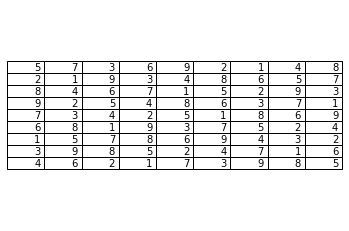

In [300]:
update_puzzle()
showTable(puzzle)